In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player  Nation    Pos  \
0              0     Theo Hernández  fr FRA     DF   
1              1    Marcel Sabitzer  at AUT     MF   
2              2   Dejan Kulusevski  se SWE  MF,FW   
3              3      Julian Brandt  de GER  FW,MF   
4              4  Nikola Milenković  rs SRB     DF   
...          ...                ...     ...    ...   
1507        2504   Souleymane Touré  fr FRA     DF   
1508        2506        Jere Uronen  fi FIN     DF   
1509        2507         Yan Valery  tn TUN     DF   
1510        2513            Vitinha  pt POR     MF   
1511        2518  Alessandro Zanoli  it ITA     DF   

                                                  Squad  \
0                                                 Milan   
1     RB Leipzig+RB Leipzig+Bayern Munich+Manchester...   
2                           Juventus+Tottenham+Juventus   
3                                              Dortmund   
4                                            Fiorentina   
...                                                 ...   
1507                                  Marseille+Auxerre   
1508                                   Brest+Schalke 04   
1509                                 Southampton+Angers   
1510                                Marseille+Paris S-G   
1511                                   Sampdoria+Napoli   

                                                Comp   Age    Born     MP  \
0                                         it Serie A  25.0  1997.0   97.0   
1     de Bundesliga+eng Premier League+de Bundesliga  29.0  1994.0   80.0   
2           it Serie A+eng Premier League+it Serie A  23.0  2000.0  103.0   
3                                      de Bundesliga  27.0  1996.0   94.0   
4                                         it Serie A  25.0  1997.0   95.0   
...                                              ...   ...     ...    ...   
1507                                      fr Ligue 1  19.0  2003.0   24.0   
1508                        fr Ligue 1+de Bundesliga  28.0  1994.0   17.0   
1509                   eng Premier League+fr Ligue 1  23.0  1999.0   31.0   
1510                                      fr Ligue 1  22.0  2000.0   50.0   
1511                                      it Serie A  21.0  2000.0   23.0   

      Starts      Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0       95.0     8415  93.5         0.17       0.31        0.15          0.29   
1       46.0    53186  47.1         0.21       0.34        0.13          0.25   
2       61.0  1265762  67.0         0.18       0.49        0.18          0.49   
3       68.0     5970  66.3         0.32       0.59        0.32          0.59   
4       91.0     8097  89.9         0.07       0.09        0.07          0.09   
...      ...      ...   ...          ...        ...         ...           ...   
1507    18.0     1656  18.4         0.05       0.05        0.05          0.05   
1508    12.0      976  10.8         0.00       0.09        0.00          0.09   
1509    31.0     2542  28.2         0.00       0.00        0.00          0.00   
1510    34.0     2910  32.4         0.12       0.22        0.12          0.22   
1511    16.0     1552  17.2         0.12       0.29        0.12          0.29   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.13          0.28        0.11            0.26               272.0   
1         0.25          0.31        0.17            0.25                38.0   
2         0.15          0.36        0.15            0.36               260.0   
3         0.18          0.43        0.18            0.43               185.0   
4         0.09          0.10        0.09            0.10                13.0   
...        ...           ...         ...             ...                 ...   
1507      0.08          0.02        0.08            0.02                19.0   
1508      0.01          0.13        0.01            0.13                12.0   
1509      0.03          0.07  

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW'])]
newbie = newbie[newbie['Pos'].isin(['FW'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [5]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0                     Player   Nation Pos  \
0             8             Matthis Abline   fr FRA  FW   
1            18                 Akor Adams   ng NGA  FW   
2            23             Elijah Adebayo  eng ENG  FW   
3            25              Simon Adingra   ci CIV  FW   
4            47            Ludovic Ajorque   fr FRA  FW   
5            80             Miguel Almirón   py PAR  FW   
6            97               Zeki Amdouni   ch SUI  FW   
7           116            Michail Antonio   jm JAM  FW   
8           117                     Antony   br BRA  FW   
9           149                 Iago Aspas   es ESP  FW   
10          156  Pierre-Emerick Aubameyang   ga GAB  FW   
11          164              Taiwo Awoniyi   ng NGA  FW   
12          165                 André Ayew   gh GHA  FW   
13          202            Folarin Balogun   us USA  FW   
14          204              Mohamed Bamba   ci CIV  FW   
15          206               Lameck Banda   zm ZAM  FW   
16          210              Léo Baptistão   br BRA  FW   
17          273          Wissam Ben Yedder   fr FRA  FW   
18          283           Domenico Berardi   it ITA  FW   
19          285             Álex Berenguer   es ESP  FW   
20          293               Isaac Bernal   es ESP  FW   
21          328               Jeremie Boga   ci CIV  FW   
22          339            Victor Boniface   ng NGA  FW   
23          347               Rafael Borré   co COL  FW   
24          364               Jarrod Bowen  eng ENG  FW   
25          365                 Lucas Boyé   ar ARG  FW   
26          394         Moritz Broschinski   de GER  FW   
27          400               Ante Budimir   hr CRO  FW   
28          432      Dominic Calvert-Lewin  eng ENG  FW   
29          441             Sergio Camello   es ESP  FW   
30          455           Francesco Caputo   it ITA  FW   
31          487       Valentín Castellanos   ar ARG  FW   
32          520             Walid Cheddira   ma MAR  FW   
33          525            Federico Chiesa   it ITA  FW   
34          537           Samuel Chukwueze   ng NGA  FW   
35          558            Lorenzo Colombo   it ITA  FW   
36          561             Kingsley Coman   fr FRA  FW   
37          628             Thijs Dallinga   nl NED  FW   
38          648             Jonathan David   ca CAN  FW   
39          664        Romain Del Castillo   fr FRA  FW   
40          696              Oumar Diakité   ci CIV  FW   
41          699                Assane Diao   es ESP  FW   
42          707                  Luis Díaz   co COL  FW   
43          765        Anastasios Douvikas   gr GRE  FW   
44          766               Artem Dovbyk   ua UKR  FW   
45          777             Marvin Ducksch   de GER  FW   
46          785                  Hugo Duro   es ESP  FW   
47          805               Caleb Ekuban   gh GHA  FW   
48          816             Emanuel Emegha   nl NED  FW   
49          818          Youssef En-Nesyri   ma MAR  FW   
50          856                 João Félix   pt POR  FW   
51          859              Evan Ferguson   ie IRL  FW   
52          952         Alejandro Garnacho   ar ARG  FW   
53          982             Olivier Giroud   fr FRA  FW   
54          994                 Maxi Gómez   uy URU  FW   
55         1008           Nicolás González   ar ARG  FW   
56         1011             Anthony Gordon  eng ENG  FW   
57         1032        Michael Gregoritsch   at AUT  FW   
58         1055             Evann Guessand   fr FRA  FW   
59         1063            Serhou Guirassy   gn GUI  FW   
60         1073             Gorka Guruzeta   es ESP  FW   
61         1080             Erling Haaland   no NOR  FW   
62         1085           Munir El Haddadi   ma MAR  FW   
63         1138              Son Heung-min   kr KOR  FW   
64         1148            Philipp Hofmann   de GER  FW   
65         1172             Rasmus Højlund   dk DEN  FW   
66         1180             Jonathan Ikone   fr FRA 

In [6]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW'])]
newbie = newbie[newbie['Pos'].isin(['FW'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW'])]
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)



In [7]:
Lukaku=player_2021[player_2021['Player']=='Romelu Lukaku']
Lukaku

Unnamed: 0         Player  Nation Pos  Squad        Comp   Age    Born  \
104      1524.0  Romelu Lukaku  be BEL  FW  Inter  it Serie A  27.0  1993.0   

       MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
104  36.0    32.0  2884  32.0         0.75       1.09        0.56   

     G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
104           0.9      0.72          0.94        0.57            0.79   

     Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
104                93.0           53.0            57.0              39.0   

     Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
104               41.9           35.19                    1.22   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
104                    1.94                   13.66                   20.12   

     Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
104                    6.72                       35.0   

     Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
104                       2.91                  1.66                     1.22   

     Carries_per_90  Total_Distance_per_90  \
104           19.62                 119.22   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
104                                60.28                        2.41   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
104                1.44                         1.56                2.91   

     Dispossessed_per_90  Passes_Received_per_90  \
104                 1.53                   28.62   

     Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
104                                9.22                        3.96   

     Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
104                     0.87                   2.84                    0.0   

     Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
104                  0.56              0.41                     0.16   

     Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
104                    0.0                   0.56                    0.0   

     Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
104                  0.16              0.16                      0.0   

     Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
104                    0.0             538.0             762.0   

     Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
104               70.6          6581.0          1431.0             334.0   

     Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  \
104             424.0               78.8              108.0   

     Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  \
104              154.0                70.1             22.0             38.0   

     Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  \
104              57.9             0.0        0.22       0.17          0.12   

     Key_Passes_per_90  Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
104               1.62               1.16                        1.19   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
104                         0.06                       2.56   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
104                    23.81                    21.81   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
104                     1.75                     0.03                  0.19   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
104             0.31            0.59                     0.0   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
104                  0.0                     0.0                      0.0   

     Str_Corner_Kicks_per_90  Pas

In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
lukaku_percentile_ranks = round(players_percentile_ranks.iloc[[104]],0)

# Print the percentile ranks for Declan Rice
print(lukaku_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
104         94.0       97.0        88.0          96.0      96.0          96.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
104        92.0            95.0                90.0           90.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
104            58.0              89.0               32.0            52.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
104                    84.0                    21.0                    31.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
104                    66.0                    93.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
104                       52.0                       78.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
104                  79.0                     72.0            57.0   

     Tota

In [9]:
import pandas as pd




params = [
    'Goals_per90', 
    'Assists_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Key_Passes_per_90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'Passes_Penalty_Area_per_90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
lukaku_percentile_ranks = round(players_percentile_ranks.iloc[[104]],0)

# Print the percentile ranks for Harry Kane
print(lukaku_percentile_ranks)


     Goals_per90  Assists_per_90  G+A_per90  Carries_Penalty_Area_per_90  \
104         94.0            47.0       97.0                         87.0   

     Shots_on_target_per90  Goal_Creating_Action_90  xA_per_90  \
104                   86.0                     99.0       87.0   

     Key_Passes_per_90  G+A-PK_per90  npxG_per90  Passes_Penalty_Area_per_90  \
104               87.0          96.0        92.0                        85.0   

     G-PK_per90  xG_per90  Goals_per_shot  Goals_per_shot_on_target  
104        88.0      96.0            82.0                      72.0  


In [10]:
lukaku_percentile_ranks_list = lukaku_percentile_ranks.values.flatten().tolist()

lukaku_percentile_ranks_list

[94.0,
 47.0,
 97.0,
 87.0,
 86.0,
 99.0,
 87.0,
 87.0,
 96.0,
 92.0,
 85.0,
 88.0,
 96.0,
 82.0,
 72.0]

In [11]:
image_path = "Lukaku.png"
fdj_cropped = Image.open(image_path)


In [12]:
len(params)

15

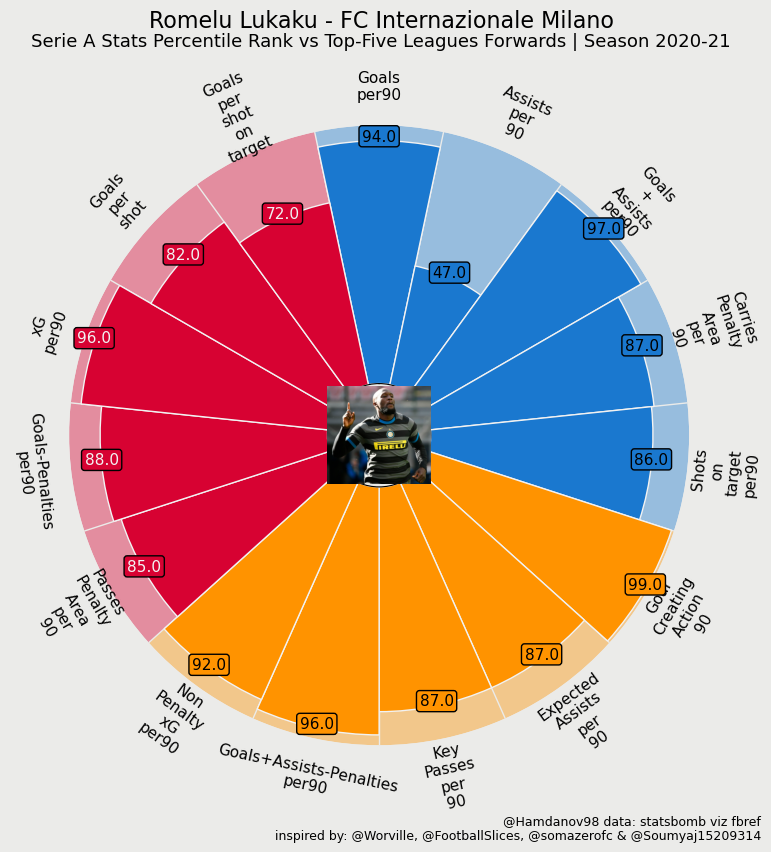

In [13]:
params = [
    'Goals_per90', 
    'Assists_per_90', 
    'Goals_+_Assists_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'Expected_Assists_per_90', 
    'Key_Passes_per_90', 
    'Goals+Assists-Penalties_per90', 
    'Non_Penalty_xG_per90', 
    'Passes_Penalty_Area_per_90', 
    'Goals-Penalties_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]


split_params = [param.replace('_', '\n') for param in params]
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    lukaku_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Romelu Lukaku - FC Internazionale Milano", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Forwards | Season 2020-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Lukaku_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [14]:
player_2024 = player_2024[player_2024['Player'] != 'Romelu Lukaku']
player_2024


Unnamed: 0                     Player   Nation Pos  \
0             8             Matthis Abline   fr FRA  FW   
1            18                 Akor Adams   ng NGA  FW   
2            23             Elijah Adebayo  eng ENG  FW   
3            25              Simon Adingra   ci CIV  FW   
4            47            Ludovic Ajorque   fr FRA  FW   
5            80             Miguel Almirón   py PAR  FW   
6            97               Zeki Amdouni   ch SUI  FW   
7           116            Michail Antonio   jm JAM  FW   
8           117                     Antony   br BRA  FW   
9           149                 Iago Aspas   es ESP  FW   
10          156  Pierre-Emerick Aubameyang   ga GAB  FW   
11          164              Taiwo Awoniyi   ng NGA  FW   
12          165                 André Ayew   gh GHA  FW   
13          202            Folarin Balogun   us USA  FW   
14          204              Mohamed Bamba   ci CIV  FW   
15          206               Lameck Banda   zm ZAM  FW   
16          210              Léo Baptistão   br BRA  FW   
17          273          Wissam Ben Yedder   fr FRA  FW   
18          283           Domenico Berardi   it ITA  FW   
19          285             Álex Berenguer   es ESP  FW   
20          293               Isaac Bernal   es ESP  FW   
21          328               Jeremie Boga   ci CIV  FW   
22          339            Victor Boniface   ng NGA  FW   
23          347               Rafael Borré   co COL  FW   
24          364               Jarrod Bowen  eng ENG  FW   
25          365                 Lucas Boyé   ar ARG  FW   
26          394         Moritz Broschinski   de GER  FW   
27          400               Ante Budimir   hr CRO  FW   
28          432      Dominic Calvert-Lewin  eng ENG  FW   
29          441             Sergio Camello   es ESP  FW   
30          455           Francesco Caputo   it ITA  FW   
31          487       Valentín Castellanos   ar ARG  FW   
32          520             Walid Cheddira   ma MAR  FW   
33          525            Federico Chiesa   it ITA  FW   
34          537           Samuel Chukwueze   ng NGA  FW   
35          558            Lorenzo Colombo   it ITA  FW   
36          561             Kingsley Coman   fr FRA  FW   
37          628             Thijs Dallinga   nl NED  FW   
38          648             Jonathan David   ca CAN  FW   
39          664        Romain Del Castillo   fr FRA  FW   
40          696              Oumar Diakité   ci CIV  FW   
41          699                Assane Diao   es ESP  FW   
42          707                  Luis Díaz   co COL  FW   
43          765        Anastasios Douvikas   gr GRE  FW   
44          766               Artem Dovbyk   ua UKR  FW   
45          777             Marvin Ducksch   de GER  FW   
46          785                  Hugo Duro   es ESP  FW   
47          805               Caleb Ekuban   gh GHA  FW   
48          816             Emanuel Emegha   nl NED  FW   
49          818          Youssef En-Nesyri   ma MAR  FW   
50          856                 João Félix   pt POR  FW   
51          859              Evan Ferguson   ie IRL  FW   
52          952         Alejandro Garnacho   ar ARG  FW   
53          982             Olivier Giroud   fr FRA  FW   
54          994                 Maxi Gómez   uy URU  FW   
55         1008           Nicolás González   ar ARG  FW   
56         1011             Anthony Gordon  eng ENG  FW   
57         1032        Michael Gregoritsch   at AUT  FW   
58         1055             Evann Guessand   fr FRA  FW   
59         1063            Serhou Guirassy   gn GUI  FW   
60         1073             Gorka Guruzeta   es ESP  FW   
61         1080             Erling Haaland   no NOR  FW   
62         1085           Munir El Haddadi   ma MAR  FW   
63         1138              Son Heung-min   kr KOR  FW   
64         1148            Philipp Hofmann   de GER  FW   
65         1172             Rasmus Højlund   dk DEN  FW   
66         1180             Jonathan Ikone   fr FRA 

In [15]:
player_2024=pd.concat([player_2024,Lukaku])
player_2024=player_2024.reset_index(drop=True)
player_2024

Unnamed: 0                     Player   Nation Pos  \
0           8.0             Matthis Abline   fr FRA  FW   
1          18.0                 Akor Adams   ng NGA  FW   
2          23.0             Elijah Adebayo  eng ENG  FW   
3          25.0              Simon Adingra   ci CIV  FW   
4          47.0            Ludovic Ajorque   fr FRA  FW   
5          80.0             Miguel Almirón   py PAR  FW   
6          97.0               Zeki Amdouni   ch SUI  FW   
7         116.0            Michail Antonio   jm JAM  FW   
8         117.0                     Antony   br BRA  FW   
9         149.0                 Iago Aspas   es ESP  FW   
10        156.0  Pierre-Emerick Aubameyang   ga GAB  FW   
11        164.0              Taiwo Awoniyi   ng NGA  FW   
12        165.0                 André Ayew   gh GHA  FW   
13        202.0            Folarin Balogun   us USA  FW   
14        204.0              Mohamed Bamba   ci CIV  FW   
15        206.0               Lameck Banda   zm ZAM  FW   
16        210.0              Léo Baptistão   br BRA  FW   
17        273.0          Wissam Ben Yedder   fr FRA  FW   
18        283.0           Domenico Berardi   it ITA  FW   
19        285.0             Álex Berenguer   es ESP  FW   
20        293.0               Isaac Bernal   es ESP  FW   
21        328.0               Jeremie Boga   ci CIV  FW   
22        339.0            Victor Boniface   ng NGA  FW   
23        347.0               Rafael Borré   co COL  FW   
24        364.0               Jarrod Bowen  eng ENG  FW   
25        365.0                 Lucas Boyé   ar ARG  FW   
26        394.0         Moritz Broschinski   de GER  FW   
27        400.0               Ante Budimir   hr CRO  FW   
28        432.0      Dominic Calvert-Lewin  eng ENG  FW   
29        441.0             Sergio Camello   es ESP  FW   
30        455.0           Francesco Caputo   it ITA  FW   
31        487.0       Valentín Castellanos   ar ARG  FW   
32        520.0             Walid Cheddira   ma MAR  FW   
33        525.0            Federico Chiesa   it ITA  FW   
34        537.0           Samuel Chukwueze   ng NGA  FW   
35        558.0            Lorenzo Colombo   it ITA  FW   
36        561.0             Kingsley Coman   fr FRA  FW   
37        628.0             Thijs Dallinga   nl NED  FW   
38        648.0             Jonathan David   ca CAN  FW   
39        664.0        Romain Del Castillo   fr FRA  FW   
40        696.0              Oumar Diakité   ci CIV  FW   
41        699.0                Assane Diao   es ESP  FW   
42        707.0                  Luis Díaz   co COL  FW   
43        765.0        Anastasios Douvikas   gr GRE  FW   
44        766.0               Artem Dovbyk   ua UKR  FW   
45        777.0             Marvin Ducksch   de GER  FW   
46        785.0                  Hugo Duro   es ESP  FW   
47        805.0               Caleb Ekuban   gh GHA  FW   
48        816.0             Emanuel Emegha   nl NED  FW   
49        818.0          Youssef En-Nesyri   ma MAR  FW   
50        856.0                 João Félix   pt POR  FW   
51        859.0              Evan Ferguson   ie IRL  FW   
52        952.0         Alejandro Garnacho   ar ARG  FW   
53        982.0             Olivier Giroud   fr FRA  FW   
54        994.0                 Maxi Gómez   uy URU  FW   
55       1008.0           Nicolás González   ar ARG  FW   
56       1011.0             Anthony Gordon  eng ENG  FW   
57       1032.0        Michael Gregoritsch   at AUT  FW   
58       1055.0             Evann Guessand   fr FRA  FW   
59       1063.0            Serhou Guirassy   gn GUI  FW   
60       1073.0             Gorka Guruzeta   es ESP  FW   
61       1080.0             Erling Haaland   no NOR  FW   
62       1085.0           Munir El Haddadi   ma MAR  FW   
63       1138.0              Son Heung-min   kr KOR  FW   
64       1148.0            Philipp Hofmann   de GER  FW   
65       1172.0             Rasmus Højlund   dk DEN  FW   
66       1180.0             Jonathan Ikone   fr FRA 

In [16]:
from sklearn.decomposition import PCA
import numpy as np

params = [
    'Goals_per90', 
    'Assists_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Key_Passes_per_90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'Passes_Penalty_Area_per_90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]
        player_2021[feature]=-player_2024[feature]

In [17]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [18]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [19]:
# Get Lukaku's row and compute cosine similarity
lukaku_2021_index = player_2024.index[player_2024['Player'] == 'Romelu Lukaku'][0]
lukaku_2021_data = transformed_df.loc[lukaku_2021_index].values.reshape(1, -1)

# Remove Lukaku from the dataset for comparison
transformed_df = transformed_df.drop(index=lukaku_2021_index)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, lukaku_2021_data).flatten()
transformed_df['similarity_to_lukaku_2021'] = similarity_scores

# Get top 10 players most similar to de Lukaku
top_similar_players_indices = transformed_df.sort_values('similarity_to_lukaku_2021', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [21]:
player_2024['similarity_to_lukaku_2021']=transformed_df['similarity_to_lukaku_2021']
player_2024[['Player', 'similarity_to_lukaku_2021']]


Player  similarity_to_lukaku_2021
0               Matthis Abline                  -0.115363
1                   Akor Adams                  -0.296704
2               Elijah Adebayo                   0.364436
3                Simon Adingra                  -0.589290
4              Ludovic Ajorque                  -0.776236
5               Miguel Almirón                  -0.818994
6                 Zeki Amdouni                  -0.821329
7              Michail Antonio                  -0.396503
8                       Antony                  -0.621234
9                   Iago Aspas                   0.083884
10   Pierre-Emerick Aubameyang                   0.672598
11               Taiwo Awoniyi                   0.458987
12                  André Ayew                  -0.427166
13             Folarin Balogun                   0.390109
14               Mohamed Bamba                   0.577509
15                Lameck Banda                  -0.577701
16               Léo Baptistão                  -0.710223
17           Wissam Ben Yedder                   0.701966
18            Domenico Berardi                  -0.011705
19              Álex Berenguer                   0.118778
20                Isaac Bernal                   0.479349
21                Jeremie Boga                  -0.223472
22             Victor Boniface                   0.744359
23                Rafael Borré                  -0.282746
24                Jarrod Bowen                   0.369919
25                  Lucas Boyé                  -0.761450
26          Moritz Broschinski                  -0.684546
27                Ante Budimir                   0.336418
28       Dominic Calvert-Lewin                  -0.357540
29              Sergio Camello                  -0.778611
30            Francesco Caputo                  -0.845587
31        Valentín Castellanos                  -0.296850
32              Walid Cheddira                  -0.551315
33             Federico Chiesa                  -0.003271
34            Samuel Chukwueze                  -0.349429
35             Lorenzo Colombo                  -0.560168
36              Kingsley Coman                   0.068129
37              Thijs Dallinga                   0.338331
38              Jonathan David                   0.728302
39         Romain Del Castillo                  -0.050514
40               Oumar Diakité                  -0.412108
41                 Assane Diao                  -0.601438
42                   Luis Díaz                  -0.029747
43         Anastasios Douvikas                   0.528673
44                Artem Dovbyk                   0.735331
45              Marvin Ducksch                  -0.025873
46                   Hugo Duro                  -0.176434
47                Caleb Ekuban                  -0.719643
48              Emanuel Emegha                  -0.207832
49           Youssef En-Nesyri                   0.177536
50                  João Félix                   0.659676
51               Evan Ferguson                  -0.371801
52          Alejandro Garnacho                  -0.202133
53              Olivier Giroud                   0.470991
54                  Maxi Gómez                  -0.854802
55            Nicolás González                   0.606834
56              Anthony Gordon                   0.329529
57         Michael Gregoritsch                   0.173687
58              Evann Guessand                  -0.335081
59             Serhou Guirassy                   0.881827
60              Gorka Guruzeta                   0.526690
61              Erling Haaland                   0.754796
62            Munir El Haddadi                  -0.855143
63               Son Heung-min                   0.500342
64             Philipp Hofmann                  -0.850808
65              Rasmus Højlund                  -0.061976
66              Jonathan Ikone                  -0.717811
67      Chukwubuikem Ikwuemesi                  -0.878038
68               Ciro 

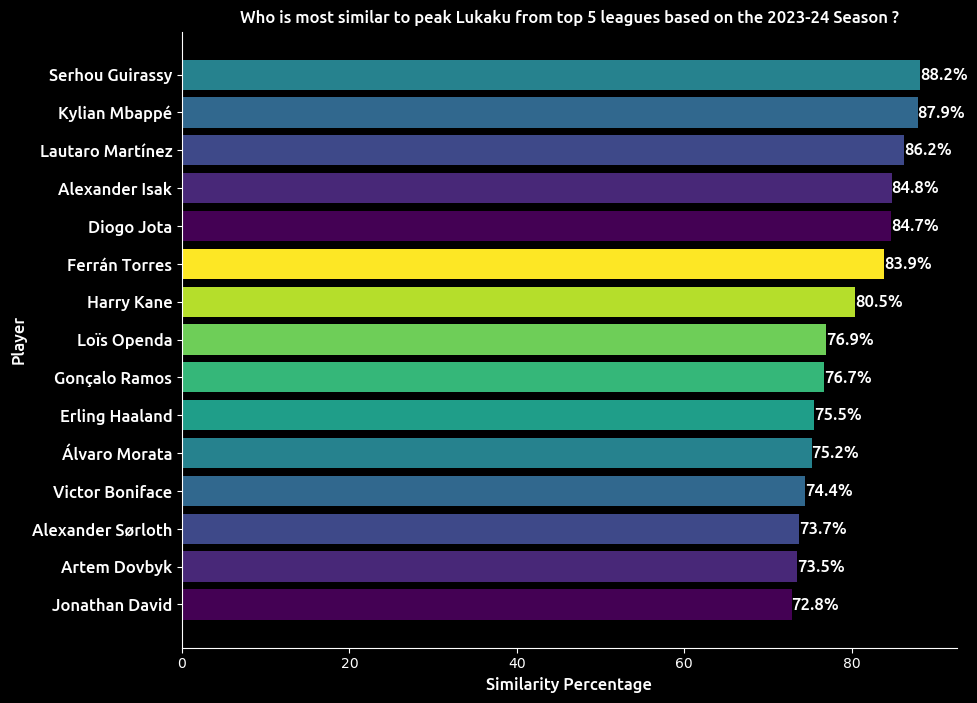

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_lukaku_2021 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_lukaku_2021', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_lukaku_2021'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to peak Lukaku from top 5 leagues based on the 2023-24 Season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [23]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW'])]
newbie = newbie[newbie['Pos'].isin(['FW'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)



In [24]:
Boniface=player_2024[player_2024['Player']=='Victor Boniface']
Boniface

Unnamed: 0           Player  Nation Pos       Squad           Comp  Age  \
22         339  Victor Boniface  ng NGA  FW  Leverkusen  de Bundesliga  0.0   

      Born  MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
22  2000.0  23      18  1546  17.2         0.82       1.28        0.58   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
22          1.05       0.9          1.12        0.71            0.93   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
22                93.0           46.0            49.5              42.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
22               45.2           37.56                    0.81   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
22                    1.51                   13.72                   22.79   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
22                    7.97                      37.33   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
22                       5.41                  2.67                     2.44   

    Carries_per_90  Total_Distance_per_90  \
22           22.62                 129.13   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
22                                64.53                        2.91   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
22                 1.8                         1.63                3.37   

    Dispossessed_per_90  Passes_Received_per_90  \
22                 1.74                    30.7   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
22                                9.19                        3.32   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
22                     0.87                   1.69                    0.0   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
22                  1.22              0.17                     0.17   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
22                   0.06                   0.52                    0.0   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
22                  0.23              0.06                     0.06   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
22                    0.0             278.0             385.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
22               72.2          3892.0           732.0             162.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
22             209.0               77.5               87.0              103.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
22                84.5             13.0             24.0              54.2   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
22            0.47        0.22       0.19          0.25               1.28   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
22               0.76                        0.76   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
22                          0.0                       1.98   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
22                    22.38                    21.34                     0.87   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
22                     0.06                  0.23             0.17   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
22            0.17                    0.29                  0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
22                     0.0                      0.0                      0.0   

    Passes_Cmp_per_90  P

In [25]:
params = [
    'Goals_per90', 
    'Assists_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Key_Passes_per_90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'Passes_Penalty_Area_per_90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Guruzeta's stats from the percentile ranks DataFrame
boniface_percentile_ranks = round(players_percentile_ranks.iloc[[22]],0)

# Print the percentile ranks for Guruzeta
boniface_percentile_ranks

Goals_per90  Assists_per_90  G+A_per90  Carries_Penalty_Area_per_90  \
22         96.0           100.0       99.0                         82.0   

    Shots_on_target_per90  Goal_Creating_Action_90  xA_per_90  \
22                   97.0                     98.0       83.0   

    Key_Passes_per_90  G+A-PK_per90  npxG_per90  Passes_Penalty_Area_per_90  \
22               65.0          98.0        98.0                        54.0   

    G-PK_per90  xG_per90  Goals_per_shot  Goals_per_shot_on_target  
22        89.0      99.0            56.0                      53.0

In [26]:
boniface_percentile_ranks_list = boniface_percentile_ranks.values.flatten().tolist()

boniface_percentile_ranks_list

[96.0,
 100.0,
 99.0,
 82.0,
 97.0,
 98.0,
 83.0,
 65.0,
 98.0,
 98.0,
 54.0,
 89.0,
 99.0,
 56.0,
 53.0]

In [27]:
image_path = "Boniface.jpg"
fdj_cropped = Image.open(image_path)


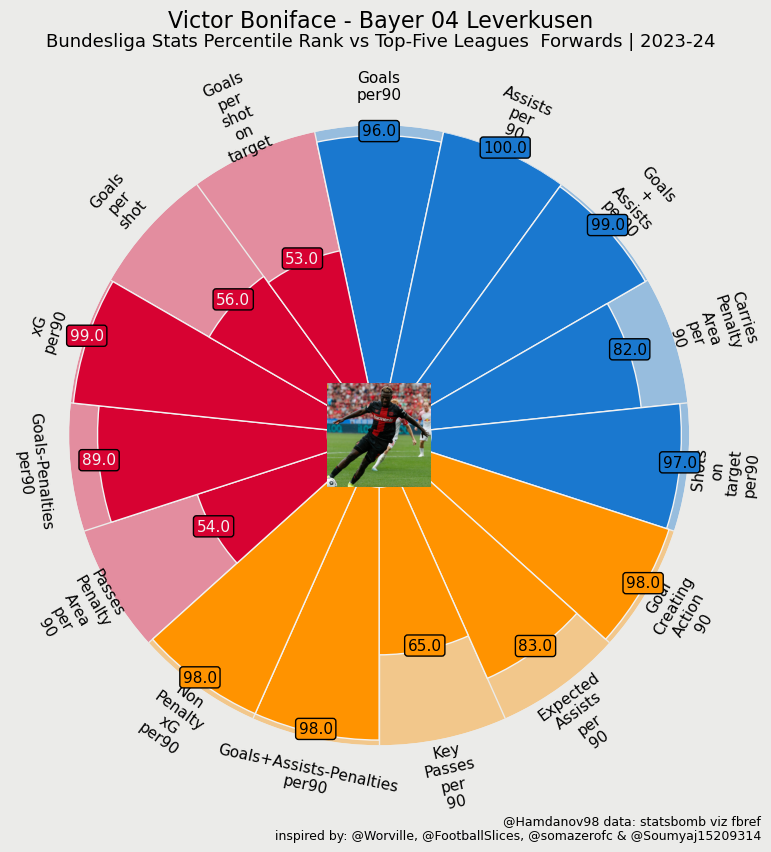

In [28]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    boniface_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Victor Boniface - Bayer 04 Leverkusen", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues  Forwards | 2023-24",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Boniface_2024_Percentile.png',dpi=500,bbox_inches = 'tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png
plt.show()
